In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

data = pd.read_csv('/content/gapminder.csv', low_memory=False)

In [57]:
data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')

In [58]:
data_centered = data.copy()
data_centered['incomeperperson'] = data_centered['incomeperperson'].subtract(data_centered['incomeperperson'].mean())
print ('Mean of', data_centered[['incomeperperson']].mean())

Mean of incomeperperson   -1.148835e-13
dtype: float64


AttributeError: ignored

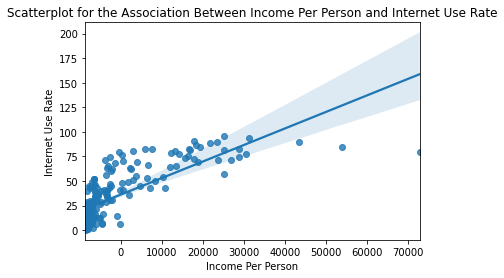

In [59]:
scat1 = sns.regplot(x="incomeperperson", y="internetuserate", scatter=True, data=data_centered)
plt.xlabel('Income Per Person')
plt.ylabel('Internet Use Rate')
plt.title ('Scatterplot for the Association Between Income Per Person and Internet Use Rate')
sns.plt.show()

In [60]:
reg1 = smf.ols('internetuserate ~ incomeperperson', data=data_centered).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        internetuserate   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     234.1
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           1.89e-34
Time:                        16:29:39   Log-Likelihood:                -792.90
No. Observations:                 183   AIC:                             1590.
Df Residuals:                     181   BIC:                             1596.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          36.0622      1.371     26.308      0.000      33.357      38.767
incomeperperson     0.0017      0.000     15.299      0.000       0.001       0.002
==============================================================================
Omnibus:                        4.027   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                5.081
Skew:                           0.012   Prob(JB):                       0.0788
Kurtosis:                       3.816   Cond. No.                     1.25e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""